In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Imputer

from sklearn.utils.estimator_checks import check_estimator

from sklearn.cross_validation import cross_val_score

In [2]:
trn_all = pd.read_csv('../data/train.csv')  # column #0 in our file is index

#selected features and Cut off outliers of Expected >= 69
#trn_new = trn_all[trn_all['Expected']<69]
trn_new = trn_all

#combine observations with same ID by using mean
#replace Nan by overall mean
trn_mean = trn_new.groupby(trn_new.Id).agg(['mean', 'median', 'std', 'count', 'min', 'max'])
trn_mean.columns = ['_'.join(col).strip() for col in trn_mean.columns.values]
trn_mean = trn_mean.drop(['Expected_count', 'Expected_median', 'Expected_std', 'Expected_min', 'Expected_max'], axis =1)

del trn_all
del trn_new

In [3]:
# ignore id's where all Ref vales are NaN
trn_mean = trn_mean[pd.notnull(trn_mean.Ref_mean)]

# Imputing
index2 = list(trn_mean)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

trn_mean= pd.DataFrame(imp.fit_transform(trn_mean),index = trn_mean.index, columns=index2)

In [4]:
# data preparation
X = trn_mean.loc[:,'minutes_past_mean':'Kdp_5x5_90th_max']
y = trn_mean.loc[:,'Expected_mean']

del trn_mean

In [13]:
from KDP import KDPRegressor
import matplotlib.pyplot as plt
# plot plots inline
%matplotlib inline  

scale = np.arange(0.01,1.1,0.01)
indexes = range(0,len(scale))
#print indexes
#print scale

In [14]:
MAE = []
for idx in indexes: 
    estimator=KDPRegressor(kdp_aa_scaling=0.33,kdp_bb_scaling=0,79)
    estimator.fit(X = X, y =y)
    y_est = estimator.predict(X = X)
    MAE.append(sum(abs(y- y_est))/ len(y))
    #print scaling, MAE

opt = MAE.index(min(MAE))
scale[opt] #best: kdp_aa_scaling=0.33,kdp_bb_scaling=0.79

0.79000000000000004

In [15]:
print(scale[opt])
print(MAE)

0.79
[23.702407151318688, 23.702282877867955, 23.702159035619648, 23.702035623615128, 23.701912640692726, 23.701790100400203, 23.701668001771619, 23.701546329075374, 23.70142515069216, 23.701304905015885, 23.70118571391605, 23.701067371553332, 23.700949834530597, 23.700833040729457, 23.700716858439328, 23.700601268820456, 23.700486436584878, 23.700372470746149, 23.700259534953922, 23.700165685133658, 23.700134474073852, 23.700104053789019, 23.700074412595146, 23.700045584530734, 23.700017425974657, 23.699990114876133, 23.699963510694676, 23.699937610486167, 23.699912444908719, 23.699888107244803, 23.699864376010034, 23.69984131058953, 23.699818827480939, 23.699796877969042, 23.699775528529333, 23.699754849796662, 23.699734880969213, 23.699715446458431, 23.699696554545145, 23.699678178692245, 23.699660290190472, 23.699642867440783, 23.69962595589524, 23.699609601330575, 23.699593790208787, 23.699578531962946, 23.699563883141426, 23.699549780536415, 23.69953614686678, 23.69952315232117, 

In [18]:
MAE = []

estimator=KDPRegressor(kdp_aa_scaling=0.33,kdp_bb_scaling=0.79)
estimator.fit(X = X, y =y)
y_est = estimator.predict(X = X)
MAE.append(sum(abs(y- y_est))/ len(y))
    #print scaling, MAE

MAE

[23.699359927054243]

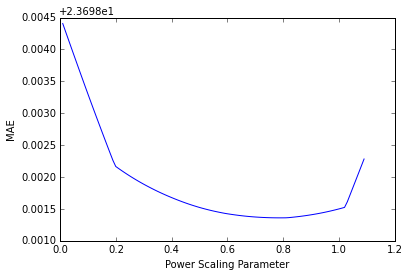

In [16]:
plt.plot(scale, MAE)
plt.xlabel("Power Scaling Parameter")
plt.ylabel("MAE")